# Machine Learning: Assignment #1 

Bárbara Nóbrega Galiza – 202408654​

Cláudia Oliveira - 202005668​

Marta Campos - 202008344

What will vary:

• number of instances (rows in your dataset table)

• number of classes (for multi-class classification problems)

• proportion of classes (balanced and imbalanced class problem)

• distribution of points within each class (shape of point clouds)

• shape of the border between the class regions, from linear to whatever

• level of noise

• level of overlap between the classes

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression, make_classification
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

### Linear regression

• number of instances (rows in your dataset table)

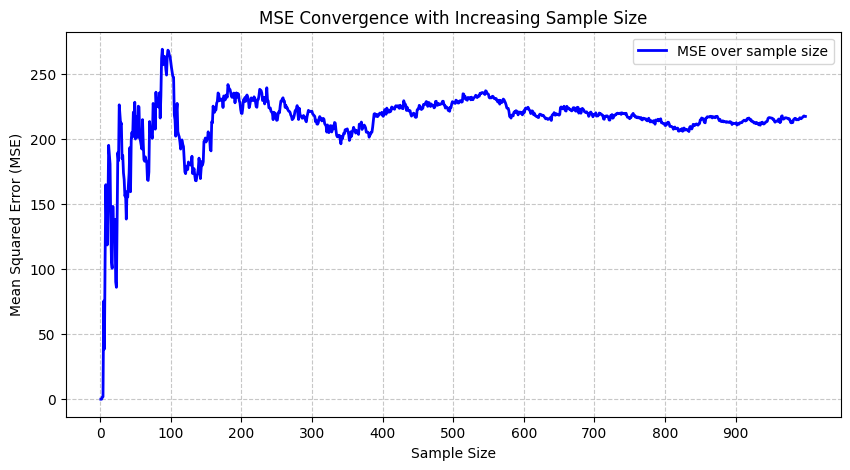

In [5]:
mse_values = []
sample_sizes = []


for i in range(1,1000):
    X, y = make_regression(n_samples=i, n_features= 2, noise=15, random_state=42)
    y = y.reshape(-1, 1)
    m = X.shape[0]

    X_b = np.c_[np.ones((m, 1)), X]  
    theta = np.array([[2.0], [3.0], [1.5]])
    learning_rate = 0.1
    n_iterations = 100

    # Performing Gradient Descent
    for _ in range(n_iterations):
        # Predictions
        y_pred = X_b.dot(theta)
        # Computing the gradient
        gradients = (2 / m) * X_b.T.dot(y_pred - y)
        # Updating parameters
        theta -= learning_rate * gradients

    y_pred = X_b.dot(theta)
    

    mse = np.mean((y_pred - y) ** 2)

    mse_values.append(mse)
    sample_sizes.append(i)
    
plt.figure(figsize=(10, 5))
plt.plot(sample_sizes, mse_values, color='blue', linewidth=2, label='MSE over sample size')
plt.xlabel('Sample Size')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE Convergence with Increasing Sample Size')
plt.xticks(np.arange(0, 1000, 100))
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()

### Logistic Regression

### LDA

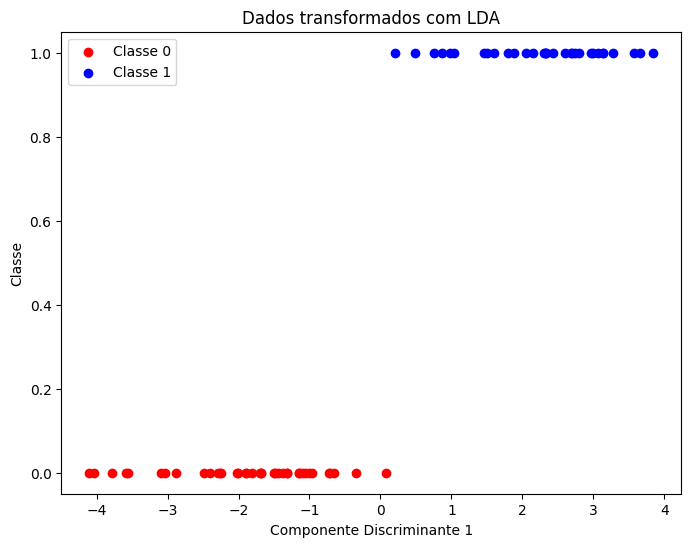

In [13]:
X, y = make_classification(n_samples=100, n_features=5, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
X_train_lda = lda.transform(X_train)
X_test_lda = lda.transform(X_test)

plt.figure(figsize=(8,6))
plt.scatter(X_train_lda[y_train == 0, 0], np.zeros_like(X_train_lda[y_train == 0, 0]), color='red', label='Classe 0')
plt.scatter(X_train_lda[y_train == 1, 0], np.ones_like(X_train_lda[y_train == 1, 0]), color='blue', label='Classe 1')
plt.title("Dados transformados com LDA")
plt.xlabel('Componente Discriminante 1')
plt.ylabel('Classe')
plt.legend()
plt.show()

• number of classes (for multi-class classification problems)

### QDA

### Decision Tree without pruning

In [22]:
X, y = make_classification(n_samples=100, n_features=5, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.92      0.79        12
           1       0.93      0.72      0.81        18

    accuracy                           0.80        30
   macro avg       0.81      0.82      0.80        30
weighted avg       0.83      0.80      0.80        30



• level of overlap between the classes

In [23]:
X, y = make_classification(n_samples=100, n_features=5, n_classes=2,class_sep=0.5, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.92      0.71        12
           1       0.91      0.56      0.69        18

    accuracy                           0.70        30
   macro avg       0.74      0.74      0.70        30
weighted avg       0.78      0.70      0.70        30



### Decision Tree with a maximum depth of 2

In [34]:
X, y = make_classification(n_samples=100, n_features=5, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
dt = DecisionTreeClassifier(max_depth=2, random_state=42)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.92      0.79        12
           1       0.93      0.72      0.81        18

    accuracy                           0.80        30
   macro avg       0.81      0.82      0.80        30
weighted avg       0.83      0.80      0.80        30



• proportion of classes (balanced and imbalanced class problem)

In [ ]:
X, y = make_classification(n_samples=100, n_features=5, n_classes=2, weights=[0.8, 0.2], random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
dt = DecisionTreeClassifier(max_depth=2, random_state=42)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        23
           1       0.88      1.00      0.93         7

    accuracy                           0.97        30
   macro avg       0.94      0.98      0.96        30
weighted avg       0.97      0.97      0.97        30



### SVM linear

### SVM RBF